In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:
X, y = make_circles(n_samples = 1000, 
                    factor=0.85, 
                    random_state=0, 
                    noise=0.1)

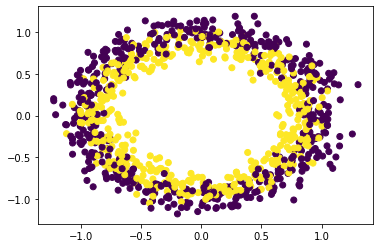

In [3]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
def get_model(inp_activation):
  model = Sequential()
  model.add(Dense(10,input_dim=2, activation=inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(1, activation="sigmoid"))
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

\begin{equation}w_{n e w}=w_{o l d}-\alpha * \frac{\delta Loss}{\delta w}\end{equation}

\begin{equation} \frac{\delta Loss}{\delta w} = \frac{w_{old} - w_{new}}{\alpha } \end{equation}

In [6]:
def change(old_weight, new_weight, learning_rate):
  gradient = (old_weight - new_weight)/ learning_rate
  weight_pct = abs(100*(old_weight - new_weight)/ old_weight)
  return gradient, weight_pct

# Sigmoid Model

In [7]:
sigmoid_model = get_model("sigmoid")

In [8]:
sigmoid_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1

In [9]:
sigmoid_model.get_weights()[0]

array([[ 0.553026  ,  0.02688819,  0.35155886, -0.66614157,  0.6596983 ,
        -0.21252313, -0.41227964,  0.25057936,  0.29612964,  0.02152205],
       [-0.5771925 ,  0.30215698, -0.6156666 , -0.42803225,  0.1554622 ,
         0.45210868, -0.13558018,  0.24603778,  0.43595666, -0.458101  ]],
      dtype=float32)

In [10]:
# Only the 1st layer
intial_weights = sigmoid_model.get_weights()[0]

In [11]:
intial_weights

array([[ 0.553026  ,  0.02688819,  0.35155886, -0.66614157,  0.6596983 ,
        -0.21252313, -0.41227964,  0.25057936,  0.29612964,  0.02152205],
       [-0.5771925 ,  0.30215698, -0.6156666 , -0.42803225,  0.1554622 ,
         0.45210868, -0.13558018,  0.24603778,  0.43595666, -0.458101  ]],
      dtype=float32)

In [12]:
sigmoid_model.fit(X_train, y_train, epochs = 1)

25/25 [==============================] - 0s 3ms/step - loss: 0.7714 - accuracy: 0.4963


In [13]:
#Only first layer
updated_weights = sigmoid_model.get_weights()[0]

In [14]:
updated_weights

array([[ 0.5530419 ,  0.02687942,  0.35154167, -0.66618073,  0.6596869 ,
        -0.21251945, -0.41228828,  0.25053248,  0.2961167 ,  0.02153784],
       [-0.5771889 ,  0.3021261 , -0.6156895 , -0.4280775 ,  0.15545824,
         0.45212108, -0.13559225,  0.24597886,  0.43595842, -0.4580681 ]],
      dtype=float32)

In [15]:
gradient, weight_change = change(intial_weights,
                                 updated_weights, 
                                 sigmoid_model.optimizer.get_config()["learning_rate"])

In [16]:
gradient

array([[-0.01585484,  0.00877492,  0.01719594,  0.03916025,  0.01138449,
        -0.00368059,  0.00864267,  0.04687905,  0.01293421, -0.01579337],
       [-0.00357628,  0.0308752 ,  0.02288818,  0.04523992,  0.00396371,
        -0.01239777,  0.01206994,  0.05891919, -0.00175834, -0.03290176]],
      dtype=float32)

In [17]:
# In Percentage value 
weight_change

array([[0.00286692, 0.03263485, 0.00489134, 0.00587867, 0.00172571,
        0.00173185, 0.00209631, 0.01870827, 0.00436775, 0.07338228],
       [0.0006196 , 0.01021827, 0.00371763, 0.01056928, 0.00254963,
        0.00274221, 0.00890244, 0.02394721, 0.00040333, 0.00718221]],
      dtype=float32)

# Relu Model

In [18]:
relu_model = get_model("relu")

In [19]:
relu_initial_weights = relu_model.get_weights()[0]
relu_initial_weights

array([[ 0.1302501 , -0.06984258,  0.68931574, -0.6916412 , -0.41096902,
        -0.6068647 ,  0.581878  ,  0.47820753, -0.00317079, -0.33504805],
       [ 0.3769403 ,  0.26202613,  0.2249003 ,  0.65052277, -0.3375359 ,
         0.39691335,  0.19958502,  0.09504116, -0.37236774,  0.18782353]],
      dtype=float32)

In [20]:
relu_model.fit(X_train, y_train, epochs = 1)

25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4712


In [21]:
relu_updated_weights = relu_model.get_weights()[0]

In [22]:
relu_updated_weights

array([[ 0.1211389 , -0.07285924,  0.69348675, -0.68339074, -0.41358626,
        -0.59796184,  0.5777299 ,  0.47857353, -0.00128396, -0.34336832],
       [ 0.38355848,  0.26038244,  0.2268685 ,  0.6425537 , -0.32854962,
         0.3886413 ,  0.20415483,  0.0895625 , -0.37841615,  0.19469225]],
      dtype=float32)

In [23]:
relu_gradient, relu_weight_pct = change(relu_initial_weights, 
                                        relu_updated_weights, 
                                        relu_model.optimizer.get_config()["learning_rate"])

In [24]:
relu_gradient

array([[ 9.111196 ,  3.016658 , -4.171014 , -8.250475 ,  2.6172397,
        -8.902847 ,  4.1481256, -0.3660023, -1.886826 ,  8.3202715],
       [-6.6181717,  1.6436874, -1.96819  ,  7.969081 , -8.986264 ,
         8.272052 , -4.5698133,  5.4786577,  6.048411 , -6.8687196]],
      dtype=float32)

In [25]:
relu_weight_pct

array([[ 6.995155  ,  4.3192253 ,  0.60509485,  1.1928836 ,  0.63684607,
         1.4670235 ,  0.7128858 ,  0.0765363 , 59.50653   ,  2.4833071 ],
       [ 1.7557613 ,  0.6272991 ,  0.8751389 ,  1.2250273 ,  2.6623137 ,
         2.0840952 ,  2.2896576 ,  5.7645106 ,  1.6243112 ,  3.6570072 ]],
      dtype=float32)